C:\Users\Nanik\AppData\Local\Temp\ipykernel_2280\3612814066.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


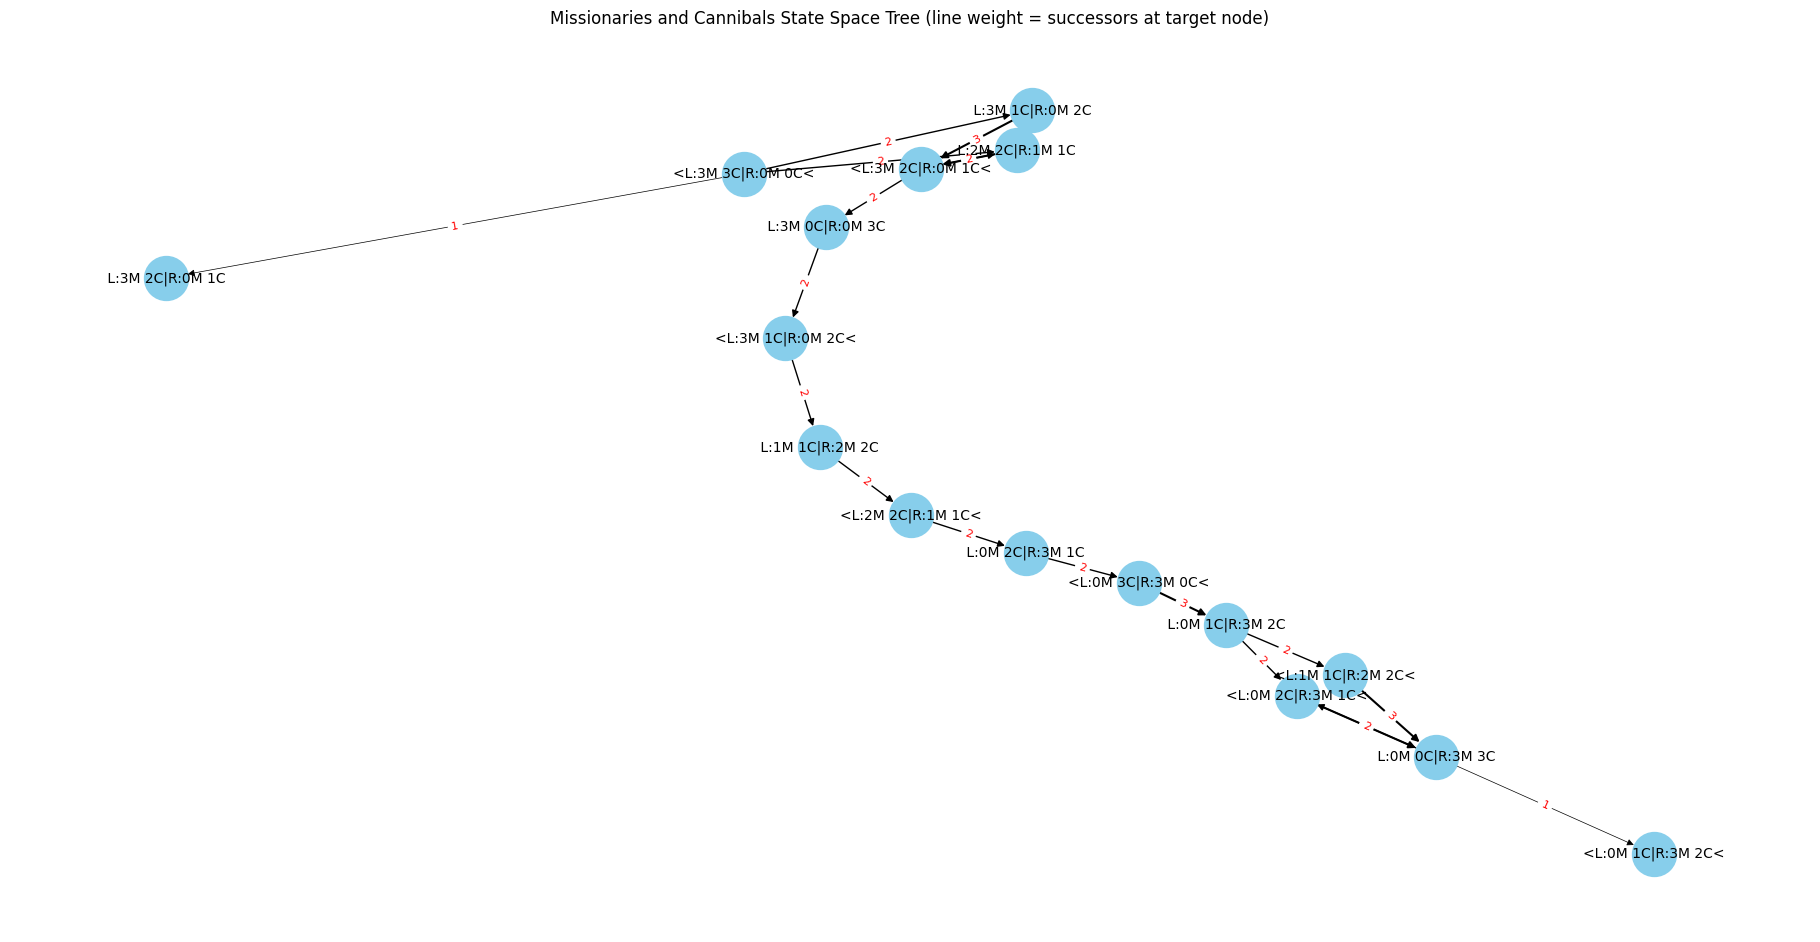

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import namedtuple, deque

# State representation: (missionaries_left, cannibals_left, boat_on_left)
State = namedtuple('State', ['m', 'c', 'b'])

def is_valid(state):
    m, c, b = state
    mm, cc = 3 - m, 3 - c  # right bank counts
    # Everyone always on 0..3, can't underflow/overflow
    if not (0 <= m <= 3 and 0 <= c <= 3 and 0 <= mm <= 3 and 0 <= cc <= 3):
        return False
    # Missionaries only eaten if outnumbered
    if (m > 0 and m < c) or (mm > 0 and mm < cc):
        return False
    return True

def get_successors(state):
    m, c, b = state
    moves = [(2,0),(1,0),(0,2),(0,1),(1,1)]
    successors = []
    sgn = -1 if b == 1 else 1
    for dm, dc in moves:
        m2 = m + sgn * dm
        c2 = c + sgn * dc
        b2 = 1 - b
        new_state = State(m2, c2, b2)
        if is_valid(new_state):
            successors.append(new_state)
    return successors

def state_label(state):
    left = f"{state.m}M {state.c}C"
    right = f"{3-state.m}M {3-state.c}C"
    boat = "<" if state.b==1 else " "
    return f"{boat}L:{left}|R:{right}{boat}"

def build_tree():
    root = State(3,3,1)
    G = nx.DiGraph()
    queue = deque()
    queue.append( (root, [root]) )  # (current_state, path_so_far)
    G.add_node(root)
    seen_global = set()
    while queue:
        curr, path = queue.popleft()
        for succ in get_successors(curr):
            if succ in path:
                continue  # Avoid cycles along the path
            G.add_node(succ)
            G.add_edge(curr, succ, weight=len(get_successors(succ)))
            if succ not in seen_global:
                queue.append( (succ, path + [succ]) )
                seen_global.add(succ)
    return G

def visualize_tree(G):
    # Use networkx's graphviz layout for trees
    try:
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
    except:
        pos = nx.spring_layout(G)
    node_labels = {n: state_label(n) for n in G.nodes()}
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    edge_widths = [G[u][v]['weight'] for u,v in G.edges()]
    plt.figure(figsize=(18,9))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000,
            font_size=10, node_color='skyblue', arrows=True, 
            width=[w/2 for w in edge_widths])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
    plt.title('Missionaries and Cannibals State Space Tree (line weight = successors at target node)')
    plt.tight_layout()
    plt.show()

# Build and visualize the tree
G = build_tree()
visualize_tree(G)
